In [3]:
import numpy as np
import pandas as pd

In [1]:
# df = pd.read_csv(r'/home/uia72388/Share_A/New Data/vels.csv')
# df.head()

In [2]:
# df.describe()

In [3]:
# vels = np.array(df['vels'].dropna()).reshape(-1,1)
# vels

In [9]:
std = np.std(vels)
std

11.90272290837005

In [10]:
var = np.var(vels)
var

141.67481263343717

In [11]:
mean = np.mean(vels)
mean

19.88682348055353

In [12]:
cofvar = (std/mean)*100
cofvar

59.852308338781256

In [13]:
import scipy.stats as st

In [14]:
#vels['vels'].value_counts()

In [15]:
mode = st.mode(vels)
mode

ModeResult(mode=array([[0.]]), count=array([[8405]]))

In [16]:
#help(scipy.stats.mode)

In [17]:
iqr = st.iqr(vels)
iqr

19.1628325

In [5]:
# rng = vels.max() - vels.min()
# rng

In [4]:
# zscores = st.zscore(vels)
# zscores

In [20]:
zscores = zscores.astype(float)

In [21]:
zscores

array([[-0.60931143],
       [-0.49880995],
       [-0.4935439 ],
       ...,
       [ 0.07084197],
       [ 0.0690187 ],
       [ 0.06756015]])

In [69]:
def summarystats(v):
    mylist= [float(min(vels)), float(np.percentile(v, 25)), float(np.percentile(v, 50)), float(np.percentile(v, 75)), float(max(vels)),
             float(np.mean(v)), float(np.median(v)), st.mode(v), float(v.count()), float(max(v)-min(v)), float( np.percentile(v, 75)-np.percentile(v, 25) ),
             float(np.std(v)), float(np.var(v)), float(((np.std(v))/(np.mean(v)))*100) ]
    d= {'Stat Values': mylist}
    listnames = ['Min', 'First Quartile: Q1 (25%)', 'Second Quartile: Q2 (50%)', 'Third Quartile: Q3 (75%)', 'Max',
                'Mean', 'Median', 'Mode', 'Count', 'Range', 'IQR', 'StdDev', 'Variance', 'Coeff. of Variation']
    
    return ( pd.DataFrame(data= d, index= listnames) )

In [171]:
class distribution():
    def __init__(self,yourarray):
        self.yourarray = yourarray
        
    def distribution_mean(self, yourarray):
        v = sorted(yourarray)
        fit = st.norm.pdf(v,np.mean(v), np.std(v))
        pl.plot(v,fit,'--')
        pl.hist(v,normed=True)
        plt.axvline( (np.mean(v)- 2*(np.std(v)) ))
        plt.axvline( (np.mean(v) + 2*(np.std(v)) ))
        pl.show()
    def distribution_med(self, yourarray):
        v = sorted(yourarray)
        fit = st.norm.pdf(v,np.median(v), np.std(v))
        pl.plot(v,fit,'--')
        pl.hist(v,normed=True)
        plt.axvline( (np.median(v)- 2*(np.std(v)) ))
        plt.axvline( (np.median(v) + 2*(np.std(v)) ))
        pl.show()    

In [148]:
class Outliers():
    def __init__(self,yourarray):
        v=yourarray
        self.mean = np.mean(v)
        self.median = np.median(v)
        self.std = np.std(v)
    def outliers_zscore(self,v):
        threshold =3.0
        self.zscores = [(i- self.mean)/self.std for i in v]
        self.outliers = np.where(np.abs(self.zscores) > threshold)
        return self
    def outliers_modified_zscore(self,v):
        threshold = 3.5
        median_y = self.median
        median_absolute_deviation_y = np.median([np.abs(y - median_y) for y in v])
        modified_z_scores = [0.6745 * (y - median_y) / median_absolute_deviation_y
                             for y in ys]
        outliers= np.where(np.abs(modified_z_scores) > threshold)
        return self
    def outliers_iqr(self,v):
        quartile_1, quartile_3 = np.percentile(v, [25, 75])
        iqr = quartile_3 - quartile_1
        lower_bound = quartile_1 - (iqr * 1.5)
        upper_bound = quartile_3 + (iqr * 1.5)
        self.outliers= np.where((v > upper_bound) | (v < lower_bound))
        return self

    def outliers_std(self,v):
        self.outliersmean=[]
        self.outliersmedian=[]
        for x in v:
            if ( (x < (mean - (2 * std))) or (x > (mean + (2 * std))) ) :
                self.outliersmean.append(x)
            if ( (x < (med - (2 * std))) or (x > (med + (2 * std))) ) : 
                self.outliersmean.append(x)
            else:
                continue
        #print('outliers_by_mean :', outliers1)   
        #print('outliers_by_median :', outliers2)
        return self
    

In [132]:
# st.zscore(vels)
# outliers=[]
# for i in zscores:
#     if (i> 3.0 or i< -3.0):
#         outliers.append(i)
#     else:
#         continue

def outliers_zscore(y):
    threshold =3.0
    mean = np.mean(y)
    std = np.std(y)
    zscores = [(i- mean)/std for i in y]
    outliers = np.where(np.abs(zscores) > threshold)
    return zscores, outliers
def outliers_modified_zscore(ys):
    threshold = 3.5
    median_y = np.median(ys)
    median_absolute_deviation_y = np.median([np.abs(y - median_y) for y in ys])
    modified_z_scores = [0.6745 * (y - median_y) / median_absolute_deviation_y
                         for y in ys]
    return np.where(np.abs(modified_z_scores) > threshold)

def outliers_iqr(v):
    quartile_1, quartile_3 = np.percentile(v, [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    outliers= np.where((v > upper_bound) | (v < lower_bound))
    return outliers

def outliers_std(v):
    outliers1=[]
    outliers2=[]
    mean = np.mean(v)
    std = np.std(v)
    med = np.median(v)
    for x in v:
        if ( (x < (mean - (2 * std))) or (x > (mean + (2 * std))) ) :
            outliers.append(x)
        if ( (x < (med - (2 * std))) or (x > (mean + (2 * std))) ) :    
        else:
            continue
    print('outliers_by_mean :', outliers1)   
    print('outliers_by_median :', outliers2)


In [210]:
# import numpy

# arr = [10, 386, 479, 627, 20, 523, 482, 483, 542, 699, 535, 617, 577, 471, 615, 583, 441, 562, 563, 527, 453, 530, 433, 541, 585, 704, 443, 569, 430, 637, 331, 511, 552, 496, 484, 566, 554, 472, 335, 440, 579, 341, 545, 615, 548, 604, 439, 556, 442, 461, 624, 611, 444, 578, 405, 487, 490, 496, 398, 512, 422, 455, 449, 432, 607, 679, 434, 597, 639, 565, 415, 486, 668, 414, 665, 763, 557, 304, 404, 454, 689, 610, 483, 441, 657, 590, 492, 476, 437, 483, 529, 363, 711, 543]

# elements = numpy.array(arr)

# mean = numpy.mean(elements, axis=0)
# sd = numpy.std(elements, axis=0)

# final_list = [x for x in arr if (x > mean - 2 * sd)]
# final_list = [x for x in final_list if (x < mean + 2 * sd)]
# print(final_list)

In [60]:
# for i, x in enumerate(new.columns):
#     print(i, x)
    
    
# cols = new.columns
# req_col = ['image.raw.hash']
# for i in cols:
#     if i.endswith('x0') or i.endswith('y0') or i.endswith('x1') or i.endswith('y1') or i.endswith('class'):
#         req_col.append(i)



# #newcol = ['image_hash']
# new_cols = map(lambda x : x.replace('annotations.','').replace('label.','') ,req_col)
# new_cols = list(new_cols)
# new_cols[0] = 'image_hash'




# d = {}
# for x,y in zip(req_col, new_cols):
#     d[x] = y



    

In [39]:
# from sklearn.preprocessing import StandardScaler as ss
# sc = ss()
# sc.fit(np.array(vels).reshape(-1,1))
# nvels =sc.transform(np.array(vels).reshape(-1,1))
# nvels

In [40]:
# fit = st.norm.pdf(nvels,np.mean(nvels),np.std(nvels))
# pl.plot(nvels,fit,'-o')
# pl.hist(nvels,normed=True)
# pl.show()

In [46]:
st.kurtosistest(v) , st.kurtosis(v), st.skewtest(v) , st.skew(v)

(KurtosistestResult(statistic=-230.28718583075, pvalue=0.0),
 -1.0328718864213216,
 SkewtestResult(statistic=4.15455178157885, pvalue=3.25925804034352e-05),
 0.02320802208206018)

In [1]:
import numpy as np
import scipy as sp
from scipy import stats as st
import pylab as pl
import matplotlib.pyplot as plt
class AllStats():
    def __init__(self,yourarray):
        v=yourarray
        self.mini= float(min(v))
        self.q1 = float(np.percentile(v, 25))
        self.q2 = float(np.percentile(v, 50))
        self.q3 = float(np.percentile(v, 75))
        self.maxi= float(max(v))
        self.mean= float(np.mean(v))
        self.median= float(np.median(v))
        self.mode= st.mode(v)
        self.count= v.shape
        self.range= float(max(v)-min(v))
        self.iqr = float( np.percentile(v, 75)-np.percentile(v, 25) )
        self.std= float(np.std(v))
        self.var= float(np.var(v))
        self.coeffvar= float(((np.std(v))/(np.mean(v)))*100)
        self.skewness = float(st.skew(v))
        self.skewtest = st.skewtest(v)
        self.kurtosis= float(st.kurtosis(v))
        self.kurttest= st.kurtosistest(v)
        self.vsort = sorted(v)
        
        
    def summarystats(self, v):
        mylist= [self.mini, self.q1, self.q2, self.q3, self.maxi, self.mean, self.median, self.mode, self.count,
                 self.range, self.iqr, self.std, self.var, self.coeffvar, self.skewness, self.skewtest, 
                  self.kurtosis, self.kurttest]
        d= {'Summary Statistics': mylist}
        listnames = ['Min', 'First Quartile: Q1 (25%)', 'Second Quartile: Q2 (50%)', 'Third Quartile: Q3 (75%)', 'Max',
                    'Mean', 'Median', 'Mode', 'Count', 'Range', 'IQR', 'StdDev', 'Variance', 'Coeff. of Variation',
                    'Skewness', 'SkewnessTest', 'Kurtosis', 'KurtosisTest']

        return ( pd.DataFrame(data= d, index= listnames) )  
    
    def outliers_zscore(self,v):
        threshold =3.0
        self.zscores = [(i- self.mean)/self.std for i in v]
        self.outliers = np.where(np.abs(self.zscores) > threshold)
        return self
    def outliers_modified_zscore(self,v):
        threshold = 3.5
        median_y = self.median
        median_absolute_deviation_y = np.median([np.abs(y - median_y) for y in v])
        modified_z_scores = [0.6745 * (y - median_y) / median_absolute_deviation_y
                             for y in ys]
        outliers= np.where(np.abs(modified_z_scores) > threshold)
        return self
    def outliers_iqr(self,v):
        quartile_1, quartile_3 = np.percentile(v, [25, 75])
        iqr = quartile_3 - quartile_1
        lower_bound = quartile_1 - (iqr * 1.5)
        upper_bound = quartile_3 + (iqr * 1.5)
        self.outliers= np.where((v > upper_bound) | (v < lower_bound))
        return self

    def outliers_std(self,v):
        self.outliersmean=[]
        self.outliersmedian=[]
        for x in v:
            if ( (x < (mean - (2 * std))) or (x > (mean + (2 * std))) ) :
                self.outliersmean.append(x)
            if ( (x < (med - (2 * std))) or (x > (med + (2 * std))) ) : 
                self.outliersmedian.append(x)
            else:
                continue
        #print('outliers_by_mean :', outliers1)   
        #print('outliers_by_median :', outliers2)
        return self
    
    def distribution_mean(self, v):
        #v = sorted(v)
        fit = st.norm.pdf(self.vsort, self.mean, self.std)
        pl.plot(self.vsort,fit,'--')
        pl.hist(self.vsort,normed=True)
        plt.axvline( (self.mean- 2*(self.std) ))
        plt.axvline( (self.mean + 2*(self.std) ))
        pl.show()      
    def distribution_med(self, v):
        fit = st.norm.pdf(self.vsort,self.median, self.std)
        pl.plot(self.vsort,fit,'--')
        pl.hist(self.vsort, density=True)
        plt.axvline( self.median- 2*(self.std) )
        plt.axvline( self.median + 2*(self.std) )
        pl.show()  

In [6]:
# obj= AllStats(vels)

In [7]:
# obj.distribution_med(vels)

# Dropping features with 40-50% missing values:

In [8]:
# import numpy as np
# import pandas as pd
# df = pd.read_csv(r'/home/uia72388/Share_A/New Data/MYDATA.csv', index_col=0)
# df.head()

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 192973 entries, 0 to 192972
Columns: 291 entries, _id to weather.val
dtypes: float64(129), int64(26), object(136)
memory usage: 429.9+ MB


In [49]:
len(df)

192973

In [9]:
# df.dropna(thresh = len(df), axis=1).columns   #192973 non-null values

In [51]:
df =df.dropna(thresh = len(df) - 0.6*len(df), axis=1) # 192973 - 0.6*192973

In [10]:
# for i in df.columns:
#     print(i)

In [11]:
# df.head()

In [12]:
# for i, x in enumerate(df.columns):
#     print(i, x)

In [13]:
# # df.columns[[1,2,5]]
# # cols=[1,2,4,5]
# data= df.drop(df.columns[[0,3,6,22,25,27,33,34,35,52]], axis=1)
# data.head()

# Checking Variances of Features and dropping features with very low Variance:

In [2]:
vneed=[]
for i in df.columns:
    if (df[i].isnull().sum()==0):
        vneed.append(i)
    else:
        continue
len(vneed)

39

In [3]:
df = df.loc[:, vneed]

In [14]:
# df['box0.classvalnew'] = df['box0.classval'].copy()
# # do this by making dict mapping or df[df['box0.classval']==0] or df1['box0.classvalnew'].loc[df1['box0.classval'] ==0] = 1
# df['box0.classvalnew'][np.where(df['box0.classval']==0)[0]] =1
# df['box0.classvalnew'][np.where(df['box0.classval']==1)[0]] =2
# df['box0.classvalnew'][np.where(df['box0.classval']==2)[0]] =3
# df['box0.classvalnew'][np.where(df['box0.classval']==3)[0]] =4
# df['box0.classvalnew'][np.where(df['box0.classval']==4)[0]] =5
# df['box0.classvalnew'][np.where(df['box0.classval']==5)[0]] =6
# df['box0.classvalnew'][np.where(df['box0.classval']==6)[0]] =7

In [5]:
df['box0.classval'].unique(), df['box0.classvalnew'].unique()

(array([0, 1, 6, 4, 5, 2, 3]), array([1, 2, 7, 5, 6, 3, 4]))

In [15]:
# X= df.drop(['_id', 'box0.sign_class.', 'box0.signId', 'sourcefile', 'timestamp', 'vdy._id', 'box0.classval'], axis=1)
# X.head()

In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()

Xnorm = scaler.fit_transform(X.values)
Xnorm.shape

(192973, 33)

In [8]:
X2 = pd.DataFrame(Xnorm, columns=X.columns)
X2.head()

,box0.area,box0.aspectratio,box0.sign_relation_main.,box0.height,box0.width,box0.x0,box0.x1,box0.y0,box0.y1,vdy.acceleration,...,box0.on_multi_sign_mounting.val,box0.twisted.val,country.val,light_conditions.val,roadType.val,road_works.val,street_conditions.val,tunnel.val,weather.val,box0.classvalnew
0,0.002834,0.065286,0.067493,0.039286,0.037313,0.356960,0.364646,0.452381,0.420213,0.349715,...,0.0,0.0,0.166667,0.0,0.5,0.0,0.0,0.0,0.0,0.0
1,0.206575,0.064615,0.067493,0.378571,0.388060,0.003416,0.091375,0.301587,0.453901,0.428106,...,0.0,0.0,0.166667,0.5,0.5,0.0,0.0,0.0,0.0,0.0
2,0.003080,0.070511,0.067493,0.039286,0.041045,0.355252,0.363792,0.450397,0.418440,0.344836,...,0.0,0.0,0.166667,0.0,0.5,0.0,0.0,0.0,0.0,0.0
3,0.002834,0.065286,0.067493,0.039286,0.037313,0.356106,0.363792,0.450397,0.418440,0.346636,...,0.0,0.0,0.166667,0.0,0.5,0.0,0.0,0.0,0.0,0.0
4,0.003080,0.070511,0.067493,0.039286,0.041045,0.354398,0.362938,0.448413,0.416667,0.342682,...,0.0,0.0,0.166667,0.0,0.5,0.0,0.0,0.0,0.0,0.0


In [15]:
import random
import math

import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')

In [10]:
sample_size = 192973

intervals = []
sample_means = []
sample_stds = []
sample_medians= []
sample_vars=[]
mins =[]
maxs =[]
for i in X2.columns:
    mini = np.min(X2[i])
    mins.append(mini)
    
    maxi = np.max(X2[i])
    maxs.append(maxi)

    sample_mean = np.mean(X2[i])
    sample_means.append(sample_mean)
    
    sample_std = np.std(X2[i])  
    sample_stds.append(sample_std)
    
    sample_var = np.var(X2[i])
    sample_vars.append(sample_var)

    sample_median = np.median(X2[i])
    sample_medians.append(sample_median)

    margin_of_error1 = [3*sample_std] #z_critical * (sample_std/math.sqrt(sample_size))
    margin_of_error2 = [sample_var]

    confidence_interval = (sample_median - margin_of_error2,
                           sample_median + margin_of_error2)  
    
    intervals.append(confidence_interval)

In [ ]:

plt.axvline(max(v1),linestyle='--',color='g')
plt.axvline(max(v2),linestyle='--',color='g')
plt.axvline(max(v3),linestyle='--',color='g')
plt.axvline(max(v4),linestyle='--',color='g')
plt.axvline(max(v5),linestyle='--',color='g')
sns.distplot(df['vdy.velocity'], kde=True, hist=False)
plt.title("Data Divided by Gaussian Mixture Modelling" , fontsize=20)
plt.xlabel('Vdy.Velocity', fontsize=12)
plt.ylabel('Peak Density', fontsize=12)
plt.savefig('GMM.jpg')

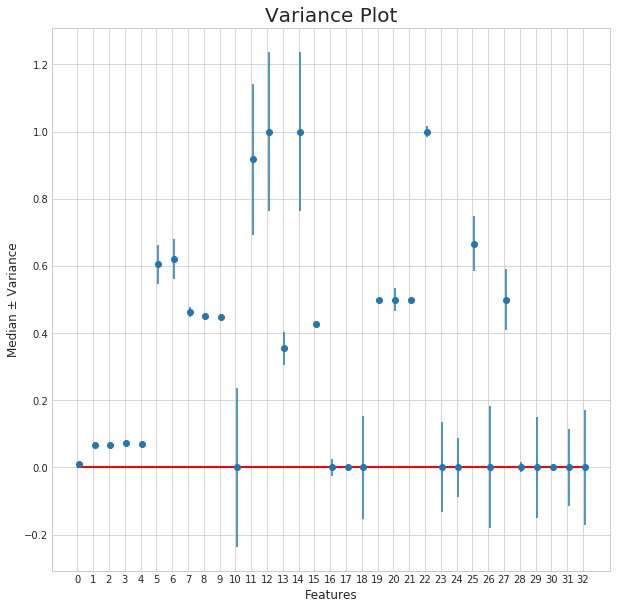

In [19]:
plt.figure(figsize=(10,10))

plt.errorbar(x=np.arange(0.1, 33, 1), 
             y=sample_medians, 
             yerr=[(top-bot)/2 for top,bot in intervals],
             fmt='o')

plt.hlines(xmin=0, xmax=32,
           y=0, 
           linewidth=2.0,
           color="red")

plt.title("Variance Plot" , fontsize=20)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Median ± Variance', fontsize=15)
plt.xticks(range(0,33))
plt.savefig('VarPlot.jpg')
#plt.hlines(y=528.0, xmax=33, xmin=0)

In [61]:
from sklearn.feature_selection import VarianceThreshold
X = data.values
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
Xnew = sel.fit_transform(X)
Xnew.shape

(192973, 16)

In [72]:
# varc = []
# for i in df2.columns:
#     try:
#         print(i, np.var(df2[i].dropna()))
#         varc.append(np.var(df2[i].dropna()))
#     except:
#         pass

In [74]:
# normX2 = preprocessing.MinMaxScaler().fit_transform(X)
# df3 = pd.DataFrame(normX2)
# df3

In [76]:
# v = sorted(varc)
# fit = st.norm.pdf(v,np.mean(v),np.std(v))
# pl.plot(v,fit,'--')
# #pl.hist(v,normed=False)
# plt.axvline( (np.mean(v)- 2*(np.std(v)) ))
# plt.axvline( (np.mean(v) + 2*(np.std(v)) ))

# pl.show()

In [103]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()

In [104]:
Xnorm = scaler.fit_transform(X)
Xnorm

array([[0.00283366, 0.06528579, 0.06749311, ..., 0.        , 0.        ,
        0.        ],
       [0.2065755 , 0.06461467, 0.06749311, ..., 0.        , 0.        ,
        0.        ],
       [0.00308006, 0.0705109 , 0.06749311, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.00828977, 0.06861086, 0.06749311, ..., 0.        , 0.        ,
        0.        ],
       [0.00869458, 0.06528579, 0.06749311, ..., 0.        , 0.        ,
        0.        ],
       [0.00828977, 0.06210529, 0.06749311, ..., 0.        , 0.        ,
        0.        ]])

In [105]:
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
Xnew = sel.fit_transform(Xnorm)
Xnew.shape

(192973, 5)

In [107]:
varcs= sel.variances_
varcs

array([0.00140819, 0.00066231, 0.00285312, 0.0051868 , 0.00536428,
       0.05784272, 0.05908873, 0.01535933, 0.01051172, 0.00382428,
       0.23586031, 0.22535089, 0.23586031, 0.04990385, 0.23586031,
       0.00143369, 0.02427985, 0.00069392, 0.15380079, 0.00121586,
       0.03532404, 0.0075699 , 0.01689081, 0.13398495, 0.08747244,
       0.08223432, 0.18195363, 0.08966828, 0.01472174, 0.15044132,
       0.00515009, 0.11445608])

In [16]:
# for i,x in zip(data.columns, varcs):
#     print(i,x)

In [17]:
# for i in data.columns:
#     print(i, data[i].nunique())

In [108]:
sel1 = VarianceThreshold(threshold=(.8 * (1 - .8)))
Xnew = sel1.fit_transform(X)
sel1.variances_

array([4.54588855e+06, 1.23769847e-01, 6.01524869e+03, 4.06645141e+02,
       3.85283931e+02, 7.93163089e+04, 8.10248907e+04, 3.90151567e+03,
       3.34373666e+03, 3.42368241e-01, 5.89650360e-04, 2.16868889e-01,
       3.77376455e-02, 1.41674253e+02, 2.08405563e-03, 2.07147807e-03,
       2.42798536e-02, 6.93915474e-04, 1.53800793e-01, 4.86345538e-03,
       1.41296179e-01, 1.21118408e-01, 6.08069032e-01, 1.33984946e-01,
       8.74724380e-02, 2.96043550e+00, 7.27814505e-01, 1.43469248e+00,
       1.47217401e-02, 6.01765273e-01, 5.15008984e-03, 1.14456076e-01])

In [88]:
varc = []
for i, x in enumerate(data.columns):
    try:
        print(i, x, np.var(data[x].dropna()))
        varc.append(np.var(data[x].dropna()))
    except:
        pass

0 box0.area 4545888.553430329
1 box0.aspectratio 0.12376984723077245
2 box0.sign_relation_main. 6015.248694820751
3 box0.height 406.6451414942504
4 box0.width 385.2839305062151
5 box0.x0 79316.30889885985
6 box0.x1 81024.89070977241
7 box0.y0 3901.5156670023703
8 box0.y1 3343.736664455582
9 vdy.acceleration 0.3423682413299216
10 vdy.axisLaodDisr 0.0005896503597598841
11 vdy.overhangfront 0.2168688886959591
12 vdy.vehicleWidth 0.03773764551831528
13 vdy.velocity 141.67425342095103
14 vdy.wheelBase 0.002084055632783753
15 vdy.yawRate 0.0020714780664889444
16 box0.contaminated.val 0.024279853605090707
17 box0.disabled.val 0.0006939154737366898
18 box0.embedded.val 0.15380079265905358
19 box0.flashing.val 0.0048634553782916975
20 box0.for_other_road.val 0.14129617857515733
21 box0.invalid.val 0.12111840838101508
22 box0.lane_distance.val 0.6080690322989916
23 box0.on_multi_sign_mounting.val 0.1339849462655915
24 box0.twisted.val 0.08747243802511533
25 country.val 2.9604355041132875
26 ligh

In [95]:
# from sklearn.preprocessing import StandardScaler
# scaler= StandardScaler()
# Xstd = scaler.fit_transform(X)
# sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
# Xnew = sel.fit_transform(Xstd)
# sel.variances_

# Hypothesis Testing

In [18]:
med = st.median(df['vdy.velocity'].dropna().values)
med

In [19]:
iqr = spst.iqr(df['vdy.velocity'].dropna().values)
l1,l2,l3,l4 ,l5= iqr , iqr*0.25 , med- (iqr*0.25) , med+ (iqr*0.25) , med
l1, l2, l3, l4 , l5


In [20]:
q1 = vels[(vels <= l3)]
q2 = vels[(vels > l3) & (vels <= l4)]
q3 = vels[(vels > l4)]

In [6]:
len(q1),len(q2),len(q3), len(q1) +len(q2)+len(q3)

NameError: name 'q1' is not defined

In [7]:
spst.ttest_ind(a=q1, b=q2, equal_var= False)

NameError: name 'spst' is not defined

In [8]:
spst.ttest_ind(a=q1, b=q1, equal_var= False)

NameError: name 'spst' is not defined

In [9]:
spst.ttest_ind(a=q2, b=q3, equal_var= False)

NameError: name 'spst' is not defined